<h1>Content<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data preparation</a></span></li><li><span><a href="#Data-analysis" data-toc-modified-id="Data-analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data analysis</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model</a></span></li></ul></div>

# Recovery of gold from ore

It is necessary to prepare a prototype of a machine learning model for the Tsifra company, which develops solutions for the efficient operation of industrial enterprises.

The model should predict the recovery rate of gold from gold ore.  It is necessary to use data with extraction and cleaning parameters.

The model will help optimize production so as not to launch an enterprise with unprofitable characteristics.

Necessary:

1. Prepare data;
2. Conduct exploratory data analysis;
3. Build and train the model.

## Data preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error
#gl_train = pd.read_csv('gold_recovery_train.csv') #gl - gold_recovery
gl_train = pd.read_csv('/datasets/gold_recovery_train.csv')
#gl_test = pd.read_csv('gold_recovery_test.csv')
gl_test = pd.read_csv('/datasets/gold_recovery_test.csv')
#gl_full = pd.read_csv('gold_recovery_full.csv')
gl_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [2]:
gl_train.info()
gl_train.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [3]:
gl_test.info()
gl_test.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
5,2016-09-01 05:59:59,168.485085,8.817007,7.420000,0.791191,1402.826803,-499.299521,1401.511119,-499.205357,1404.088107,...,12.029797,-499.814895,8.036586,-500.371492,8.041446,-510.037054,4.983949,-499.990990,24.978973,-500.475640
6,2016-09-01 06:59:59,144.133440,7.924610,7.420000,0.788838,1398.252401,-499.748672,1393.255503,-499.195380,1396.738566,...,12.026296,-499.473127,8.027984,-500.983079,7.907340,-507.964971,5.010224,-500.043697,25.040709,-499.501984
7,2016-09-01 07:59:59,133.513396,8.055252,6.988000,0.801871,1401.669677,-501.777839,1400.754446,-502.514024,1400.465244,...,12.040911,-501.293852,8.020490,-499.185229,8.116897,-511.927561,5.036498,-500.149615,25.032580,-503.970657
8,2016-09-01 08:59:59,133.735356,7.999618,6.935000,0.789329,1402.358981,-499.981597,1400.985954,-496.802968,1401.168584,...,11.998184,-499.481608,8.012610,-500.896783,7.974422,-521.199104,5.061599,-499.791519,25.005063,-497.613716
9,2016-09-01 09:59:59,126.961069,8.017856,7.030000,0.805298,1400.816120,-499.014158,1399.975401,-499.570552,1401.871924,...,12.040725,-499.987743,7.989503,-499.750625,7.989710,-509.946737,5.068811,-499.293900,24.992741,-499.272255


In [4]:
gl_full.info()
gl_full.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


Preliminary analysis revealed a significant number of gaps in each of the data files. Taking into account the conditions of the task, we will process them as the steps of the task are completed.

Let's move on to checking the calculation of enrichment efficiency.

In [5]:
def recovery_calc(C, F, T):
    recovery = ((C * (F - T)) / (F * (C - T))) * 100
    return recovery

First of all, the formula for calculating the enrichment efficiency was written down.

In [6]:
gl_train['rougher.output.recovery_calc'] = recovery_calc(gl_train['rougher.output.concentrate_au'], 
                                                         gl_train['rougher.input.feed_au'],
                                                        gl_train['rougher.output.tail_au'])

In [7]:
gl_train[['rougher.output.recovery', 'rougher.output.recovery_calc']].info()
gl_train[['rougher.output.recovery', 'rougher.output.recovery_calc']].head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 2 columns):
rougher.output.recovery         14287 non-null float64
rougher.output.recovery_calc    14577 non-null float64
dtypes: float64(2)
memory usage: 263.6 KB


,rougher.output.recovery,rougher.output.recovery_calc
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794
5,88.156912,88.156912
6,88.168065,88.168065
7,87.668336,87.668336
8,87.035862,87.035862
9,87.650868,87.650868


After the calculations, attention was drawn to the fact that there are a large number of gaps in the rougher.output.recovery and rougher.output.recovery_calc columns, as well as anomalous values less than 0 and greater than 100, which cannot be, based on the efficiency calculation condition.

In [8]:
gl_train.loc[gl_train.loc[:, 'rougher.output.recovery'] < 0] = np.nan
gl_train.loc[gl_train.loc[:, 'rougher.output.recovery'] > 100] = np.nan

In [9]:
gl_train.loc[gl_train.loc[:, 'rougher.output.recovery_calc'] < 0] = np.nan
gl_train.loc[gl_train.loc[:, 'rougher.output.recovery_calc'] > 100] = np.nan

In [10]:
gl_train[['rougher.output.recovery', 'rougher.output.recovery_calc']].info()
gl_train[['rougher.output.recovery', 'rougher.output.recovery_calc']].head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 2 columns):
rougher.output.recovery         14287 non-null float64
rougher.output.recovery_calc    14287 non-null float64
dtypes: float64(2)
memory usage: 263.6 KB


,rougher.output.recovery,rougher.output.recovery_calc
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794
5,88.156912,88.156912
6,88.168065,88.168065
7,87.668336,87.668336
8,87.035862,87.035862
9,87.650868,87.650868


Anomalous values were replaced by gaps, since obviously erroneous calculations should not actually give a result.

In [11]:
gl_train.dropna(subset = ['rougher.output.recovery', 'rougher.output.recovery_calc'], inplace = True)
gl_train.reset_index(drop=True, inplace=True)
gl_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14287 entries, 0 to 14286
Data columns (total 88 columns):
date                                                  14287 non-null object
final.output.concentrate_ag                           14282 non-null float64
final.output.concentrate_pb                           14282 non-null float64
final.output.concentrate_sol                          14055 non-null float64
final.output.concentrate_au                           14283 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14287 non-null float64
final.output.tail_pb                                  14173 non-null float64
final.output.tail_sol                                 14279 non-null float64
final.output.tail_au                                  14287 non-null float64
primary_cleaner.input.sulfate                         14261 non-null float64
primary_cleaner.input.depressant             

Due to the fact that the enrichment efficiency value is an important value for further work and we have no other way to fill it in (technical filling, for example, with an average value, can lead to data distortion and obtaining a final incorrect result), it was decided to completely exclude the lines with gaps in the rougher.output.recovery and rougher.output.recovery_calc columns.

In [12]:
print("MAE между расчетным значением rougher.output.recovery и данными:", 
      mean_absolute_error(gl_train['rougher.output.recovery_calc'], gl_train['rougher.output.recovery']))

MAE между расчетным значением rougher.output.recovery и данными: 9.444891926100695e-15


According to the results of the calculations, MAE between the calculated value of rougher.output.recovery and its value from the provided data turned out to be tending to zero, which indicates the correctness of the calculations of this feature in the provided data.

We turn to the analysis of features that are not available in the test sample.

In [13]:
train_columns = gl_train.columns
test_columns = gl_test.columns
no_test_columns = train_columns.drop(test_columns)
print("Признаки, отсутствующие в тестовой выборке:", no_test_columns)

Признаки, отсутствующие в тестовой выборке: Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'ro

In [14]:
gl_train = gl_train.drop(no_test_columns, 1)
gl_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14287 entries, 0 to 14286
Data columns (total 53 columns):
date                                          14287 non-null object
primary_cleaner.input.sulfate                 14261 non-null float64
primary_cleaner.input.depressant              14249 non-null float64
primary_cleaner.input.feed_size               14287 non-null float64
primary_cleaner.input.xanthate                14182 non-null float64
primary_cleaner.state.floatbank8_a_air        14283 non-null float64
primary_cleaner.state.floatbank8_a_level      14286 non-null float64
primary_cleaner.state.floatbank8_b_air        14283 non-null float64
primary_cleaner.state.floatbank8_b_level      14286 non-null float64
primary_cleaner.state.floatbank8_c_air        14285 non-null float64
primary_cleaner.state.floatbank8_c_level      14286 non-null float64
primary_cleaner.state.floatbank8_d_air        14284 non-null float64
primary_cleaner.state.floatbank8_d_level      14286 non-null flo

As clarified, gl_train contains 88 columns, including the rougher.output.recovery_calc column we created for testing. In turn, gl_test has only 53 columns. The difference is primarily that gl_test has no output features, and there are also a few other features that are missing, probably because they are calculated later and are not available at the initial data collection stage. For correct further investigation, columns missing from gl_test were also removed from gl_train.

We proceed to the final data preprocessing.

In [15]:
gl_train.set_index('date', inplace=True)
gl_test.set_index('date', inplace=True)
gl_full.set_index('date', inplace=True)

In [16]:
gl_train.info()
gl_train.head(20)

<class 'pandas.core.frame.DataFrame'>
Index: 14287 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 52 columns):
primary_cleaner.input.sulfate                 14261 non-null float64
primary_cleaner.input.depressant              14249 non-null float64
primary_cleaner.input.feed_size               14287 non-null float64
primary_cleaner.input.xanthate                14182 non-null float64
primary_cleaner.state.floatbank8_a_air        14283 non-null float64
primary_cleaner.state.floatbank8_a_level      14286 non-null float64
primary_cleaner.state.floatbank8_b_air        14283 non-null float64
primary_cleaner.state.floatbank8_b_level      14286 non-null float64
primary_cleaner.state.floatbank8_c_air        14285 non-null float64
primary_cleaner.state.floatbank8_c_level      14286 non-null float64
primary_cleaner.state.floatbank8_d_air        14284 non-null float64
primary_cleaner.state.floatbank8_d_level      14286 non-null float64
rougher.input.feed_ag               

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,-500.888152,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
2016-01-15 05:00:00,115.581252,12.470773,7.25,0.965760,1602.964922,-498.090944,1602.074298,-500.179481,1602.154812,-498.642614,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
2016-01-15 06:00:00,117.322323,12.469088,7.25,0.895207,1597.532455,-500.985364,1602.816321,-500.696736,1603.572091,-500.256955,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
2016-01-15 07:00:00,124.592960,12.467403,7.25,0.901202,1597.946266,-501.592304,1601.078254,-499.494115,1602.630688,-500.173741,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
2016-01-15 08:00:00,131.781026,12.465718,7.25,0.885535,1601.670053,-499.548891,1598.804355,-499.689644,1601.689285,-500.484957,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188


In [17]:
gl_test.info()
gl_test.head(20)

<class 'pandas.core.frame.DataFrame'>
Index: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.input.feed_ag                         584

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
2016-09-01 05:59:59,168.485085,8.817007,7.420000,0.791191,1402.826803,-499.299521,1401.511119,-499.205357,1404.088107,-497.903666,...,12.029797,-499.814895,8.036586,-500.371492,8.041446,-510.037054,4.983949,-499.990990,24.978973,-500.475640
2016-09-01 06:59:59,144.133440,7.924610,7.420000,0.788838,1398.252401,-499.748672,1393.255503,-499.195380,1396.738566,-497.923683,...,12.026296,-499.473127,8.027984,-500.983079,7.907340,-507.964971,5.010224,-500.043697,25.040709,-499.501984
2016-09-01 07:59:59,133.513396,8.055252,6.988000,0.801871,1401.669677,-501.777839,1400.754446,-502.514024,1400.465244,-503.451306,...,12.040911,-501.293852,8.020490,-499.185229,8.116897,-511.927561,5.036498,-500.149615,25.032580,-503.970657
2016-09-01 08:59:59,133.735356,7.999618,6.935000,0.789329,1402.358981,-499.981597,1400.985954,-496.802968,1401.168584,-499.890350,...,11.998184,-499.481608,8.012610,-500.896783,7.974422,-521.199104,5.061599,-499.791519,25.005063,-497.613716


In [18]:
gl_full.info()
gl_full.head(20)

<class 'pandas.core.frame.DataFrame'>
Index: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant                      21170 non-null float64
primary_cleaner.i

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,115.581252,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,117.322323,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,124.592960,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,131.781026,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188


Before the final processing of the data, the date column was set with an index, since this feature does not affect the results of subsequent model training, but it can be useful when filling in the gaps and comparing the datasets we have.

In [19]:
gl_train[gl_train.isna().any(axis=1)].head(20)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-16 23:00:00,126.397495,12.709727,7.250,1.229626,1601.301169,-498.725777,1605.370031,-500.644437,1598.360694,-500.461991,...,13.997488,-551.224653,11.971272,-550.095619,9.981163,-502.869109,7.941184,-500.623610,12.018837,-600.916665
2016-01-19 02:00:00,15.273131,1.940663,7.250,0.180119,1546.951271,-501.138590,1550.530280,-500.130616,1551.535239,-502.251161,...,13.947368,-703.993293,12.018188,-559.800324,9.999754,-512.673353,7.946763,-500.475471,11.963962,-607.847547
2016-01-20 17:00:00,45.682471,4.025308,7.250,0.399221,1549.121877,-498.662929,1550.086558,-500.499551,1547.956133,-498.348771,...,14.055718,-549.694176,12.005398,-550.660760,10.019514,-501.677694,8.123011,-499.966297,11.995185,-601.176360
2016-01-21 10:00:00,NaN,NaN,7.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-28 06:00:00,40.522905,3.921921,7.730,0.457748,1496.248961,-499.942859,1501.181155,-499.140333,1500.799985,-499.132886,...,14.962364,-552.603157,13.015154,-550.108720,10.050661,-605.892733,7.993430,-600.128409,11.973748,-603.013151
2016-01-30 16:00:00,NaN,NaN,8.480,0.009179,1500.533165,-500.977978,1499.756644,-498.828214,1500.727791,-500.811369,...,0.000073,-500.292197,0.000068,-506.891392,-0.251167,-501.800291,0.668043,-500.396051,0.230999,-500.013874
2016-01-31 06:00:00,43.320036,NaN,8.100,0.622271,1498.602898,-500.274945,1501.114391,-500.430283,1501.513677,-499.986651,...,14.989145,-499.547060,13.057198,-499.027603,13.996761,-500.355129,13.950817,-500.321720,16.015743,-498.213796
2016-01-31 07:00:00,44.998230,NaN,8.100,0.680230,1498.641206,-500.356599,1500.491395,-500.066400,1498.025102,-500.064345,...,15.021193,-503.354246,12.997230,-508.022142,13.998385,-501.803887,14.046225,-499.799878,16.012260,-501.635575
2016-01-31 08:00:00,49.131706,NaN,7.395,0.729487,1498.679514,-499.290144,1500.017522,-499.743788,1498.563948,-499.837535,...,14.969862,-504.630601,12.993907,-508.320739,14.039645,-499.463907,13.995551,-500.101543,15.956461,-500.987799


In [20]:
gl_train.fillna(axis=1, method='ffill', inplace=True)
gl_train.fillna(axis=1, method='bfill', inplace=True)
gl_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14287 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 52 columns):
primary_cleaner.input.sulfate                 14287 non-null float64
primary_cleaner.input.depressant              14287 non-null float64
primary_cleaner.input.feed_size               14287 non-null float64
primary_cleaner.input.xanthate                14287 non-null float64
primary_cleaner.state.floatbank8_a_air        14287 non-null float64
primary_cleaner.state.floatbank8_a_level      14287 non-null float64
primary_cleaner.state.floatbank8_b_air        14287 non-null float64
primary_cleaner.state.floatbank8_b_level      14287 non-null float64
primary_cleaner.state.floatbank8_c_air        14287 non-null float64
primary_cleaner.state.floatbank8_c_level      14287 non-null float64
primary_cleaner.state.floatbank8_d_air        14287 non-null float64
primary_cleaner.state.floatbank8_d_level      14287 non-null float64
rougher.input.feed_ag               

In [21]:
gl_test.fillna(axis=1, method='ffill', inplace=True)
gl_test.fillna(axis=1, method='bfill', inplace=True)
gl_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
primary_cleaner.input.sulfate                 5856 non-null float64
primary_cleaner.input.depressant              5856 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5856 non-null float64
primary_cleaner.state.floatbank8_a_air        5856 non-null float64
primary_cleaner.state.floatbank8_a_level      5856 non-null float64
primary_cleaner.state.floatbank8_b_air        5856 non-null float64
primary_cleaner.state.floatbank8_b_level      5856 non-null float64
primary_cleaner.state.floatbank8_c_air        5856 non-null float64
primary_cleaner.state.floatbank8_c_level      5856 non-null float64
primary_cleaner.state.floatbank8_d_air        5856 non-null float64
primary_cleaner.state.floatbank8_d_level      5856 non-null float64
rougher.input.feed_ag                         585

In [22]:
gl_full.fillna(axis=1, method='ffill', inplace=True)
gl_full.fillna(axis=1, method='bfill', inplace=True)
gl_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           22716 non-null float64
final.output.concentrate_pb                           22716 non-null float64
final.output.concentrate_sol                          22716 non-null float64
final.output.concentrate_au                           22716 non-null float64
final.output.recovery                                 22716 non-null float64
final.output.tail_ag                                  22716 non-null float64
final.output.tail_pb                                  22716 non-null float64
final.output.tail_sol                                 22716 non-null float64
final.output.tail_au                                  22716 non-null float64
primary_cleaner.input.sulfate                         22716 non-null float64
primary_cleaner.input.depressant                      22716 non-null float64
primary_cleaner.i

Since, according to the information we have, the parameters adjacent in time are similar, the ffill and bfill methods were successively applied to fill in the gaps. According to the results of their work, the gaps were completely filled.

Let's move on to data analysis.

## Data analysis

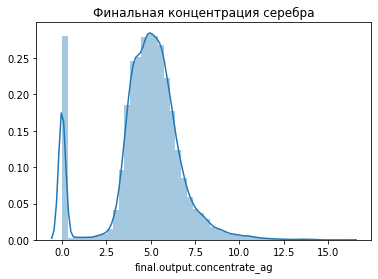

In [23]:
sns.distplot(gl_full['final.output.concentrate_ag'])
plt.title('Финальная концентрация серебра')
plt.show()

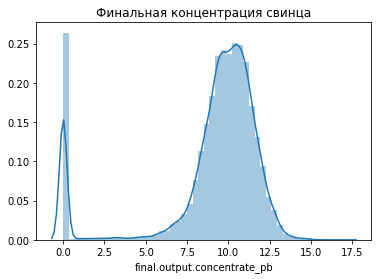

In [24]:
sns.distplot(gl_full['final.output.concentrate_pb'])
plt.title('Финальная концентрация свинца')
plt.show()

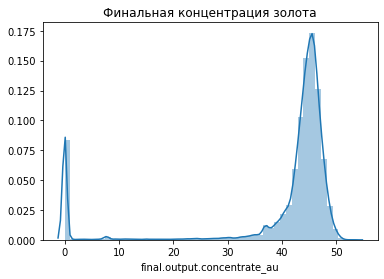

In [25]:
sns.distplot(gl_full['final.output.concentrate_au'])
plt.title('Финальная концентрация золота')
plt.show()

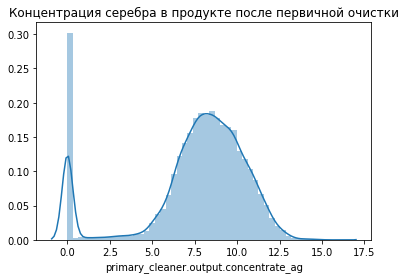

In [26]:
sns.distplot(gl_full['primary_cleaner.output.concentrate_ag'])
plt.title('Концентрация серебра в продукте после первичной очистки')
plt.show()

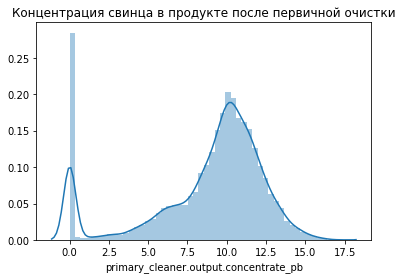

In [27]:
sns.distplot(gl_full['primary_cleaner.output.concentrate_pb'])
plt.title('Концентрация свинца в продукте после первичной очистки')
plt.show()

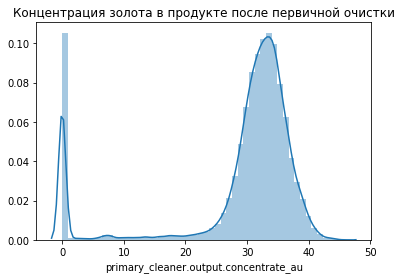

In [28]:
sns.distplot(gl_full['primary_cleaner.output.concentrate_au'])
plt.title('Концентрация золота в продукте после первичной очистки')
plt.show()

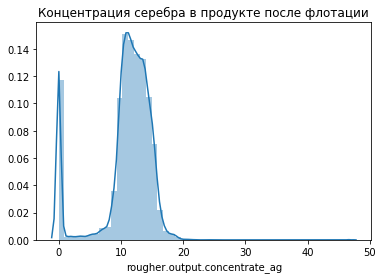

In [29]:
sns.distplot(gl_full['rougher.output.concentrate_ag'])
plt.title('Концентрация серебра в продукте после флотации')
plt.show()

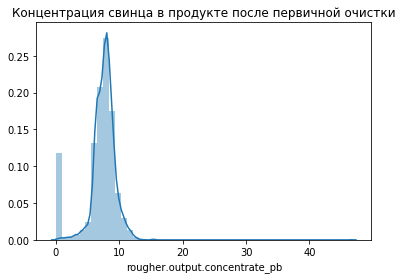

In [30]:
sns.distplot(gl_full['rougher.output.concentrate_pb'])
plt.title('Концентрация свинца в продукте после первичной очистки')
plt.show()

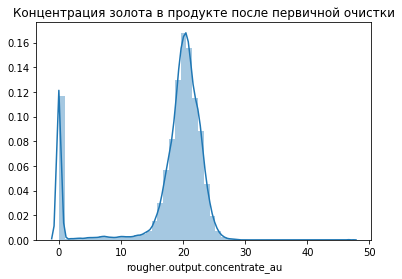

In [31]:
sns.distplot(gl_full['rougher.output.concentrate_au'])
plt.title('Концентрация золота в продукте после первичной очистки')
plt.show()

According to the results of the analysis of data on the concentrations of metals at various stages of the technological process, a decrease in the concentrations of silver and lead, and an increase in the concentration of gold were noted, which is absolutely true, based on the conditions for cleaning the ore. Additionally, attention was drawn to the large number of values near zero when visualizing each parameter. Lines with these values should be removed from gl_train and gl_test.

In [32]:
concentrates = ['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_au', 
                'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 
                'primary_cleaner.output.concentrate_au', 'rougher.output.concentrate_ag', 
                'rougher.output.concentrate_pb', 'rougher.output.concentrate_au']
for concentrate in concentrates:
    gl_train = gl_train.drop(gl_full.index[gl_full[concentrate] <= 0], errors='ignore')
gl_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13810 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 52 columns):
primary_cleaner.input.sulfate                 13810 non-null float64
primary_cleaner.input.depressant              13810 non-null float64
primary_cleaner.input.feed_size               13810 non-null float64
primary_cleaner.input.xanthate                13810 non-null float64
primary_cleaner.state.floatbank8_a_air        13810 non-null float64
primary_cleaner.state.floatbank8_a_level      13810 non-null float64
primary_cleaner.state.floatbank8_b_air        13810 non-null float64
primary_cleaner.state.floatbank8_b_level      13810 non-null float64
primary_cleaner.state.floatbank8_c_air        13810 non-null float64
primary_cleaner.state.floatbank8_c_level      13810 non-null float64
primary_cleaner.state.floatbank8_d_air        13810 non-null float64
primary_cleaner.state.floatbank8_d_level      13810 non-null float64
rougher.input.feed_ag               

In [33]:
for concentrate in concentrates:
    gl_test = gl_test.drop(gl_full.index[gl_full[concentrate] <= 0], errors='ignore')
gl_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5278 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
primary_cleaner.input.sulfate                 5278 non-null float64
primary_cleaner.input.depressant              5278 non-null float64
primary_cleaner.input.feed_size               5278 non-null float64
primary_cleaner.input.xanthate                5278 non-null float64
primary_cleaner.state.floatbank8_a_air        5278 non-null float64
primary_cleaner.state.floatbank8_a_level      5278 non-null float64
primary_cleaner.state.floatbank8_b_air        5278 non-null float64
primary_cleaner.state.floatbank8_b_level      5278 non-null float64
primary_cleaner.state.floatbank8_c_air        5278 non-null float64
primary_cleaner.state.floatbank8_c_level      5278 non-null float64
primary_cleaner.state.floatbank8_d_air        5278 non-null float64
primary_cleaner.state.floatbank8_d_level      5278 non-null float64
rougher.input.feed_ag                         527

After completing the analysis of metal concentrations, we proceed to the analysis of the size distribution of raw material granules.

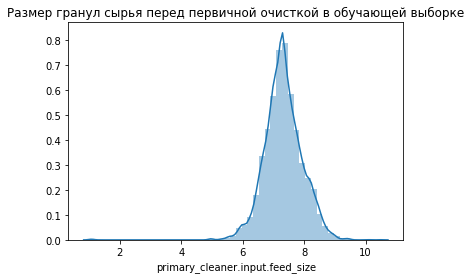

In [34]:
sns.distplot(gl_train['primary_cleaner.input.feed_size'])
plt.title('Размер гранул сырья перед первичной очисткой в обучающей выборке')
plt.show()

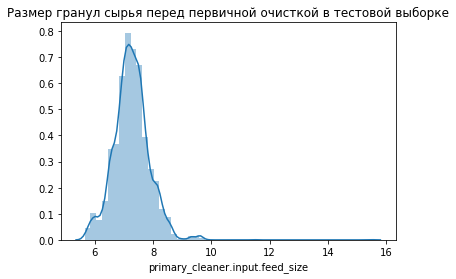

In [35]:
sns.distplot(gl_test['primary_cleaner.input.feed_size'])
plt.title('Размер гранул сырья перед первичной очисткой в тестовой выборке')
plt.show()

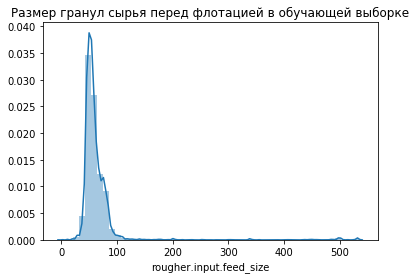

In [36]:
sns.distplot(gl_train['rougher.input.feed_size'])
plt.title('Размер гранул сырья перед флотацией в обучающей выборке')
plt.show()

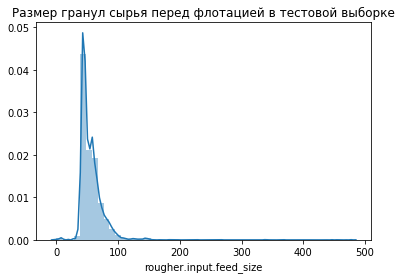

In [37]:
sns.distplot(gl_test['rougher.input.feed_size'])
plt.title('Размер гранул сырья перед флотацией в тестовой выборке')
plt.show()

An analysis of the generated graphs of the size distribution of raw materials before flotation and primary purification in the training and test samples showed that they have the same types and frequencies, which indicates the correctness of the division into samples (randomness is preserved). Sample data can be used to train models.

We turn to the study of the total concentrations of all substances.

In [38]:
rougher_feed = (gl_full['rougher.input.feed_ag'] + gl_full['rougher.input.feed_pb'] 
                + gl_full['rougher.input.feed_sol'] + gl_full['rougher.input.feed_au'])
rougher_concentrate = (gl_full['rougher.output.concentrate_ag'] + gl_full['rougher.output.concentrate_pb'] 
                       + gl_full['rougher.output.concentrate_sol'] + gl_full['rougher.output.concentrate_au'])
cleaner_concentrate = (gl_full['primary_cleaner.output.concentrate_ag'] 
                       + gl_full['primary_cleaner.output.concentrate_pb'] 
                       + gl_full['primary_cleaner.output.concentrate_sol'] 
                       + gl_full['primary_cleaner.output.concentrate_au'])
final_concentrate = (gl_full['final.output.concentrate_ag'] + gl_full['final.output.concentrate_pb'] 
                       + gl_full['final.output.concentrate_sol'] + gl_full['final.output.concentrate_au'])

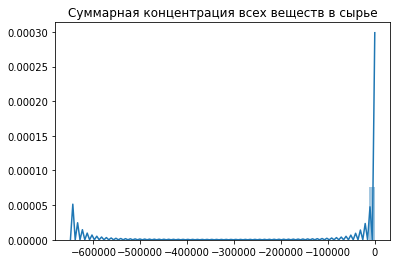

In [39]:
sns.distplot(rougher_feed)
plt.title('Суммарная концентрация всех веществ в сырье')
plt.show()

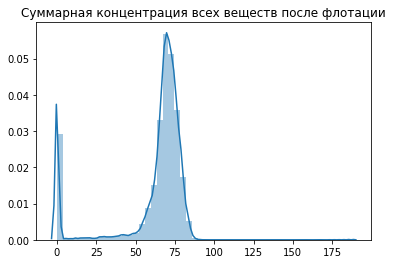

In [40]:
sns.distplot(rougher_concentrate)
plt.title('Суммарная концентрация всех веществ после флотации')
plt.show()

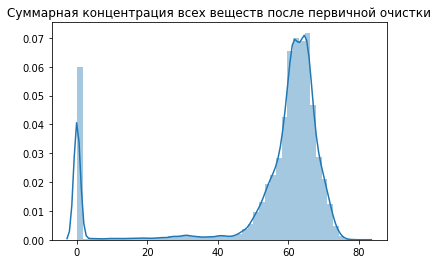

In [41]:
sns.distplot(cleaner_concentrate)
plt.title('Суммарная концентрация всех веществ после первичной очистки')
plt.show()

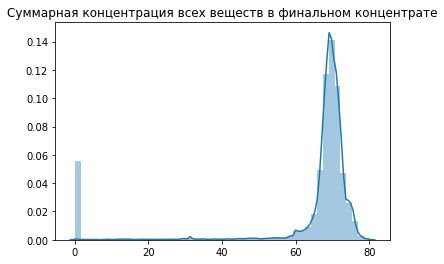

In [42]:
sns.distplot(final_concentrate)
plt.title('Суммарная концентрация всех веществ в финальном концентрате')
plt.show()

As before, in the results of the analysis of data on the concentrations of metals at various stages of the technological process, here, when analyzing the total concentrations of all substances, indicators with values near zero were noted. Lines with these values should be removed from gl_train and gl_test.

In [43]:
all_concentrates = [rougher_feed, rougher_concentrate, cleaner_concentrate, final_concentrate]
for concentrate in all_concentrates:
    gl_train = gl_train.drop(concentrate.index[concentrate <= 0], errors='ignore')
gl_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13810 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 52 columns):
primary_cleaner.input.sulfate                 13810 non-null float64
primary_cleaner.input.depressant              13810 non-null float64
primary_cleaner.input.feed_size               13810 non-null float64
primary_cleaner.input.xanthate                13810 non-null float64
primary_cleaner.state.floatbank8_a_air        13810 non-null float64
primary_cleaner.state.floatbank8_a_level      13810 non-null float64
primary_cleaner.state.floatbank8_b_air        13810 non-null float64
primary_cleaner.state.floatbank8_b_level      13810 non-null float64
primary_cleaner.state.floatbank8_c_air        13810 non-null float64
primary_cleaner.state.floatbank8_c_level      13810 non-null float64
primary_cleaner.state.floatbank8_d_air        13810 non-null float64
primary_cleaner.state.floatbank8_d_level      13810 non-null float64
rougher.input.feed_ag               

In [44]:
all_concentrates = [rougher_feed, rougher_concentrate, cleaner_concentrate, final_concentrate]
for concentrate in all_concentrates:
    gl_test = gl_test.drop(concentrate.index[concentrate <= 0], errors='ignore')
gl_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5260 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
primary_cleaner.input.sulfate                 5260 non-null float64
primary_cleaner.input.depressant              5260 non-null float64
primary_cleaner.input.feed_size               5260 non-null float64
primary_cleaner.input.xanthate                5260 non-null float64
primary_cleaner.state.floatbank8_a_air        5260 non-null float64
primary_cleaner.state.floatbank8_a_level      5260 non-null float64
primary_cleaner.state.floatbank8_b_air        5260 non-null float64
primary_cleaner.state.floatbank8_b_level      5260 non-null float64
primary_cleaner.state.floatbank8_c_air        5260 non-null float64
primary_cleaner.state.floatbank8_c_level      5260 non-null float64
primary_cleaner.state.floatbank8_d_air        5260 non-null float64
primary_cleaner.state.floatbank8_d_level      5260 non-null float64
rougher.input.feed_ag                         526

Let's move on to building the model.

## Model

In [45]:
def smape_calc(y_target, y_pred):
    smape = ((1/len(y_target)) * np.sum(2 * np.abs(y_target - y_pred) / (np.abs(y_target) + np.abs(y_pred)))) * 100
    return smape

In [46]:
def smape_total(smape_rougher, smape_final):
    smape_t = (0.25 * smape_rougher) + (0.75 * smape_final)
    return smape_t

First of all, the function for calculating sMAPE indicators and the final sMAPE were formed based on the conditions of the task.

In [50]:
gl_train['rougher.output.recovery'] = pd.Series(gl_full['rougher.output.recovery'])
gl_train['final.output.recovery'] = pd.Series(gl_full['final.output.recovery'])
gl_train.info()

(date
 2016-01-15 00:00:00    87.107763
 2016-01-15 01:00:00    86.843261
 2016-01-15 02:00:00    86.842308
 2016-01-15 03:00:00    87.226430
 2016-01-15 04:00:00    86.688794
                          ...    
 2018-08-18 06:59:59    89.574376
 2018-08-18 07:59:59    87.724007
 2018-08-18 08:59:59    88.890579
 2018-08-18 09:59:59    89.858126
 2018-08-18 10:59:59    89.514960
 Name: rougher.output.recovery, Length: 22716, dtype: float64,
 date
 2016-01-15 00:00:00    87.107763
 2016-01-15 01:00:00    86.843261
 2016-01-15 02:00:00    86.842308
 2016-01-15 03:00:00    87.226430
 2016-01-15 04:00:00    86.688794
                          ...    
 2018-08-18 06:59:59    89.574376
 2018-08-18 07:59:59    87.724007
 2018-08-18 08:59:59    88.890579
 2018-08-18 09:59:59    89.858126
 2018-08-18 10:59:59    89.514960
 Name: rougher.output.recovery, Length: 22716, dtype: float64)

In [47]:
gl_train['rougher.output.recovery'] = pd.Series(gl_full['rougher.output.recovery'])
gl_train['final.output.recovery'] = pd.Series(gl_full['final.output.recovery'])
gl_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13810 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 54 columns):
primary_cleaner.input.sulfate                 13810 non-null float64
primary_cleaner.input.depressant              13810 non-null float64
primary_cleaner.input.feed_size               13810 non-null float64
primary_cleaner.input.xanthate                13810 non-null float64
primary_cleaner.state.floatbank8_a_air        13810 non-null float64
primary_cleaner.state.floatbank8_a_level      13810 non-null float64
primary_cleaner.state.floatbank8_b_air        13810 non-null float64
primary_cleaner.state.floatbank8_b_level      13810 non-null float64
primary_cleaner.state.floatbank8_c_air        13810 non-null float64
primary_cleaner.state.floatbank8_c_level      13810 non-null float64
primary_cleaner.state.floatbank8_d_air        13810 non-null float64
primary_cleaner.state.floatbank8_d_level      13810 non-null float64
rougher.input.feed_ag               

In [48]:
gl_test['rougher.output.recovery'] = pd.Series(gl_full['rougher.output.recovery'])
gl_test['final.output.recovery'] = pd.Series(gl_full['final.output.recovery'])
gl_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5260 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 54 columns):
primary_cleaner.input.sulfate                 5260 non-null float64
primary_cleaner.input.depressant              5260 non-null float64
primary_cleaner.input.feed_size               5260 non-null float64
primary_cleaner.input.xanthate                5260 non-null float64
primary_cleaner.state.floatbank8_a_air        5260 non-null float64
primary_cleaner.state.floatbank8_a_level      5260 non-null float64
primary_cleaner.state.floatbank8_b_air        5260 non-null float64
primary_cleaner.state.floatbank8_b_level      5260 non-null float64
primary_cleaner.state.floatbank8_c_air        5260 non-null float64
primary_cleaner.state.floatbank8_c_level      5260 non-null float64
primary_cleaner.state.floatbank8_d_air        5260 non-null float64
primary_cleaner.state.floatbank8_d_level      5260 non-null float64
rougher.input.feed_ag                         526

Before splitting the samples, the target features rougher.output.recovery and final.output.recovery were returned from the general gl_full sample.

In [49]:
features_train_rougher = gl_train.drop(['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant', 
                                        'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
                                        'primary_cleaner.state.floatbank8_a_air', 
                                        'primary_cleaner.state.floatbank8_a_level', 
                                        'primary_cleaner.state.floatbank8_b_air', 
                                        'primary_cleaner.state.floatbank8_b_level',
                                        'primary_cleaner.state.floatbank8_c_air', 
                                        'primary_cleaner.state.floatbank8_c_level',
                                        'primary_cleaner.state.floatbank8_d_air', 
                                        'primary_cleaner.state.floatbank8_d_level', 
                                        'secondary_cleaner.state.floatbank2_a_air',
                                        'secondary_cleaner.state.floatbank2_a_level',
                                        'secondary_cleaner.state.floatbank2_b_air',
                                        'secondary_cleaner.state.floatbank2_b_level',
                                        'secondary_cleaner.state.floatbank3_a_air',
                                        'secondary_cleaner.state.floatbank3_a_level',
                                        'secondary_cleaner.state.floatbank3_b_air',
                                        'secondary_cleaner.state.floatbank3_b_level', 
                                        'secondary_cleaner.state.floatbank4_a_air',
                                        'secondary_cleaner.state.floatbank4_a_level',
                                        'secondary_cleaner.state.floatbank4_b_air',
                                        'secondary_cleaner.state.floatbank4_b_level',
                                        'secondary_cleaner.state.floatbank5_a_air',
                                        'secondary_cleaner.state.floatbank5_a_level',
                                        'secondary_cleaner.state.floatbank5_b_air',
                                        'secondary_cleaner.state.floatbank5_b_level',
                                        'secondary_cleaner.state.floatbank6_a_air',
                                        'secondary_cleaner.state.floatbank6_a_level', 
                                        'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train_rougher = gl_train['rougher.output.recovery']
features_train_final = gl_train.drop(['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_rate',
                                      'rougher.input.feed_size', 'rougher.input.feed_sol', 'rougher.input.feed_au', 
                                      'rougher.input.floatbank10_sulfate', 'rougher.input.floatbank10_xanthate',
                                      'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate', 
                                      'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level', 
                                      'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level', 
                                      'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level', 
                                      'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level', 
                                      'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level', 
                                      'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level', 
                                      'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train_final = gl_train['final.output.recovery']
features_test_rougher = gl_test.drop(['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant', 
                                      'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
                                      'primary_cleaner.state.floatbank8_a_air', 
                                      'primary_cleaner.state.floatbank8_a_level', 
                                      'primary_cleaner.state.floatbank8_b_air', 
                                      'primary_cleaner.state.floatbank8_b_level',
                                      'primary_cleaner.state.floatbank8_c_air', 
                                      'primary_cleaner.state.floatbank8_c_level',
                                      'primary_cleaner.state.floatbank8_d_air', 
                                      'primary_cleaner.state.floatbank8_d_level', 
                                      'secondary_cleaner.state.floatbank2_a_air',
                                      'secondary_cleaner.state.floatbank2_a_level',
                                      'secondary_cleaner.state.floatbank2_b_air',
                                      'secondary_cleaner.state.floatbank2_b_level',
                                      'secondary_cleaner.state.floatbank3_a_air',
                                      'secondary_cleaner.state.floatbank3_a_level',
                                      'secondary_cleaner.state.floatbank3_b_air',
                                      'secondary_cleaner.state.floatbank3_b_level', 
                                      'secondary_cleaner.state.floatbank4_a_air',
                                      'secondary_cleaner.state.floatbank4_a_level',
                                      'secondary_cleaner.state.floatbank4_b_air',
                                      'secondary_cleaner.state.floatbank4_b_level',
                                      'secondary_cleaner.state.floatbank5_a_air',
                                      'secondary_cleaner.state.floatbank5_a_level',
                                      'secondary_cleaner.state.floatbank5_b_air',
                                      'secondary_cleaner.state.floatbank5_b_level',
                                      'secondary_cleaner.state.floatbank6_a_air',
                                      'secondary_cleaner.state.floatbank6_a_level', 
                                      'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test_rougher = gl_test['rougher.output.recovery']
features_test_final = gl_test.drop(['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_rate',
                                    'rougher.input.feed_size', 'rougher.input.feed_sol', 'rougher.input.feed_au', 
                                    'rougher.input.floatbank10_sulfate', 'rougher.input.floatbank10_xanthate',
                                    'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate', 
                                    'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level', 
                                    'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level', 
                                    'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level', 
                                    'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level', 
                                    'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level', 
                                    'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level',
                                    'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test_final = gl_test['final.output.recovery']

Further, each of the samples was divided into features (features) and a target feature (target). Based on the task set before us, the target features are the efficiency of enrichment after flotation and at the end of the process.  These are the 'rougher.output.recovery' and 'final.output.recovery' columns, which were added on purpose from the full sample. Each target feature will be considered separately and, accordingly, a list of features was formed for each of them, depending on the stage of the process (before and after the rougher).

In [50]:
model_parameters = {
    'DecisionTree':{
        'model':DecisionTreeRegressor(random_state=12345),
        'params':{
            'max_depth':range(1, 10)
        }
    },
    'RandomForest':{
        'model':RandomForestRegressor(random_state=12345),
        'params':{
            'max_depth':range(1, 10),
            'n_estimators':range(1, 25)
        }
    },
    'LinearRegression':{
        'model':LinearRegression(),
        'params':{
        }
    }
}

In [51]:
%%time

score_rougher = []

for model_name, model_params in model_parameters.items():
    clf = GridSearchCV(model_params['model'], 
                       model_params['params'], 
                       scoring=make_scorer(smape_calc, greater_is_better=False), 
                       cv=5)
    clf.fit(features_train_rougher, target_train_rougher)
    score_rougher.append({
        'model':model_name,
        'best_sMAPE':clf.best_score_,
        'best_parameters':clf.best_params_
    })

display(pd.DataFrame(score_rougher))

,model,best_sMAPE,best_parameters
0,DecisionTree,-7.595554,{'max_depth': 2}
1,RandomForest,-6.789750,"{'max_depth': 3, 'n_estimators': 4}"
2,LinearRegression,-7.603317,{}


CPU times: user 14min 6s, sys: 1.51 s, total: 14min 8s
Wall time: 14min 9s


In [52]:
%%time

score_final = []

for model_name, model_params in model_parameters.items():
    clf = GridSearchCV(model_params['model'], 
                       model_params['params'], 
                       scoring=make_scorer(smape_calc, greater_is_better=False), 
                       cv=5)
    clf.fit(features_train_final, target_train_final)
    score_final.append({
        'model':model_name,
        'best_sMAPE':clf.best_score_,
        'best_parameters':clf.best_params_
    })

display(pd.DataFrame(score_final))

,model,best_sMAPE,best_parameters
0,DecisionTree,-10.543074,{'max_depth': 2}
1,RandomForest,-10.422266,"{'max_depth': 2, 'n_estimators': 1}"
2,LinearRegression,-10.402410,{}


CPU times: user 18min 51s, sys: 1.69 s, total: 18min 52s
Wall time: 18min 53s


In order to complete the task in terms of using cross-validation when training the model, GridSearchCV was applied with the selection of parameters for the models of decision dever, random forest and linear regression. As a result of the work carried out, the best sMAPE indicator after rougher was obtained on a random forest model with parameters: n_estimators - 4, max_depth - 3. For the end of the process, the best model is a linear regression model. According to the GridSearchCV documentation, when using make-scorer, as in our case, the sMAPE indicator will need to be taken modulo, without a minus obtained from the results of the work.

In [53]:
model_rougher = RandomForestRegressor(random_state=12345, n_estimators=4, max_depth=3)
model_rougher.fit(features_train_rougher, target_train_rougher)
predicted_rougher = model_rougher.predict(features_test_rougher)
smape_rougher = smape_calc(target_test_rougher, predicted_rougher)
print("Эффективность обогащения после флотации на тестовой выборке, %:", smape_rougher)

Эффективность обогащения после флотации на тестовой выборке, %: 7.7732673782179145


In [54]:
model_final = LinearRegression()
model_final.fit(features_train_final, target_train_final)
predicted_final = model_final.predict(features_test_final)
smape_final = smape_calc(target_test_final, predicted_final)
print("Эффективность обогащения в конце процесса на тестовой выборке, %:", smape_final)

Эффективность обогащения в конце процесса на тестовой выборке, %: 9.36820669930108


In [55]:
print("Итоговая (общая) эффективность обогащения, %:", smape_total(smape_rougher, smape_final))

Итоговая (общая) эффективность обогащения, %: 8.969471869030288


Based on the results of this work, we have successfully developed a model for predicting the recovery of gold from gold-bearing ore.

We transfer the result to optimize production.